# PROJECT 4

Добавим необходимые библиотеки

In [1]:
import pandas as pd
from pandas import Series
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/test.csv
/kaggle/input/sf-dst-scoring/train.csv


Загрузим необходимые данные

In [2]:
train = pd.read_csv('/kaggle/input/sf-dst-scoring/train.csv')
test= pd.read_csv('/kaggle/input/sf-dst-scoring/test.csv')

# 1.Посмотрим на данные

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

Также, как и на платформе skillfactory есть пропуски в данных в столбце "education"  
Появились новые (дополнительные) данные: app_date, score_bki, region_rating, sna, first_time  
Описание данных к проекту:

client_id - идентификатор клиента

education - уровень образования

sex - пол заемщика

age - возраст заемщика

car - флаг наличия автомобиля

car_type - флаг автомобиля иномарки

decline_app_cnt - количество отказанных прошлых заявок

good_work - флаг наличия “хорошей” работы

bki_request_cnt - количество запросов в БКИ

home_address - категоризатор домашнего адреса

work_address - категоризатор рабочего адреса

income - доход заемщика

foreign_passport - наличие загранпаспорта

sna - связь заемщика с клиентами банка

first_time - давность наличия информации о заемщике

score_bki - скоринговый балл по данным из БКИ

region_rating - рейтинг региона

app_date - дата подачи заявки

default - флаг дефолта по кредиту

In [5]:
train.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
5893,23829,30JAN2014,GRD,M,51,N,N,0,0,-2.142227,3,60,2,3,70000,1,4,N,0
67300,16525,23JAN2014,SCH,M,22,N,N,0,0,-1.542789,2,80,2,3,25000,1,2,N,1
11998,30428,06FEB2014,SCH,M,23,Y,Y,0,1,-1.794172,0,80,2,3,30000,2,1,Y,0
22710,93374,09APR2014,GRD,F,35,Y,N,0,0,-3.230846,1,50,2,3,15000,1,3,N,0
5430,18948,26JAN2014,SCH,M,40,N,N,0,0,-1.712683,2,60,1,2,22000,1,4,N,0


In [6]:
test.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
32305,55563,04MAR2014,SCH,M,38,Y,N,0,0,-2.702203,1,40,1,3,30000,1,3,Y
6145,78738,26MAR2014,SCH,M,51,Y,N,0,0,-2.068699,5,60,2,3,38000,3,1,Y
8055,78165,26MAR2014,SCH,F,32,N,N,3,0,-1.651098,0,50,1,3,16000,1,3,N
928,104267,22APR2014,SCH,F,44,Y,N,0,1,-2.076222,0,50,1,2,50000,4,2,N
11796,46969,24FEB2014,GRD,M,32,N,N,0,1,-3.404200,4,80,2,3,50000,1,1,Y


In [7]:
train.shape, test.shape

((73799, 19), (36349, 18))

В итоге у нас стало больше признаков, чем было на skillfactory (как и было обещано)  
19 в тренировочной и 18 в тестовой  

# 2.Предварительный анализ данных

Порядок следующий:
рассмотрим подробнее новые признаки  
заполним пропуски в столбце "education"  
сгруппируем все признаки по типу  
найдем выбросы в числовых признаках  
рассмотрим бинарные признаки  
рассмотрим категориальные признаки

Найдем выбросы. Но удалять их сразу не будем, посмотрим на результаты

# 2.1.app_date  
дата подачи заявки  

по виду мы понимаем, что это дата, но в формате object. Поменяем формат на дата

In [8]:
train.app_date = pd.to_datetime(train.app_date, format='%d%b%Y')
test.app_date = pd.to_datetime(train.app_date, format='%d%b%Y')
print(train.app_date.sample(5))
print(test.app_date.sample(5))

48142   2014-03-18
32887   2014-01-25
881     2014-04-29
38800   2014-02-10
38476   2014-01-04
Name: app_date, dtype: datetime64[ns]
26512   2014-01-17
35039   2014-04-05
18530   2014-02-19
26156   2014-04-21
10242   2014-01-29
Name: app_date, dtype: datetime64[ns]


In [9]:
train.app_date.max(), test.app_date.max()

(Timestamp('2014-04-30 00:00:00'), Timestamp('2014-04-30 00:00:00'))

In [10]:
train.app_date.min(), test.app_date.min()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

Судя по цифрам, данные у нас за период с 1 января по 30 апреля 2014 года  
Создадим дополнительные признаки: число дней от начала периода (1 января), месяц подачи заявки, день недели подачи заявки

In [11]:
min_day = train.app_date.min() 
train['days'] = (train.app_date - min_day).dt.days.astype('int')
test['days'] = (test.app_date - min_day).dt.days.astype('int')

In [12]:
train['month'] = train.app_date.dt.month
test['month'] = test.app_date.dt.month

In [13]:
train['weekday'] = train.app_date.dt.weekday
test['weekday'] = test.app_date.dt.weekday

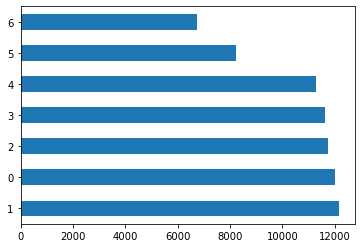

In [14]:
train['weekday'].value_counts().plot.barh()

в будние дни заявок больше, чем в выходные

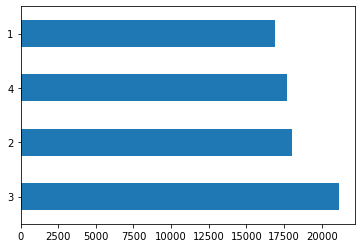

In [15]:
train['month'].value_counts().plot.barh()

# 2.2. education

уровень образования

In [16]:
train.education = train.education.astype(str).apply(lambda x: None if x.strip()=='' else x)
test.education = test.education.astype(str).apply(lambda x: None if x.strip()=='' else x)
train['education'].value_counts(), test['education'].value_counts()

(SCH    38860
 GRD    23365
 UGR     9816
 PGR     1257
 nan      307
 ACD      194
 Name: education, dtype: int64,
 SCH    19138
 GRD    11403
 UGR     4932
 PGR      608
 nan      171
 ACD       97
 Name: education, dtype: int64)

Пропуски заполним самым популярным значением

In [17]:
train.education = train.education.replace('nan', 'SCH') 
test.education = test.education.replace('nan', 'SCH') 

In [18]:
train['education'] = train['education'].apply(lambda x: x.replace('SCH','1')) 
train['education'] = train['education'].apply(lambda x: x.replace('GRD','2')) 
train['education'] = train['education'].apply(lambda x: x.replace('UGR','3')) 
train['education'] = train['education'].apply(lambda x: x.replace('PGR','4')) 
train['education'] = train['education'].apply(lambda x: x.replace('ACD','5')) 

test['education'] = test['education'].apply(lambda x: x.replace('SCH','1')) 
test['education'] = test['education'].apply(lambda x: x.replace('GRD','2')) 
test['education'] = test['education'].apply(lambda x: x.replace('UGR','3')) 
test['education'] = test['education'].apply(lambda x: x.replace('PGR','4')) 
test['education'] = test['education'].apply(lambda x: x.replace('ACD','5')) 

# 2.3.score_bki

скоринговый балл по данным из БКИ

In [19]:
train.score_bki.describe()

count    73799.000000
mean        -1.904724
std          0.498231
min         -3.624586
25%         -2.259534
50%         -1.920823
75%         -1.569831
max          0.199773
Name: score_bki, dtype: float64

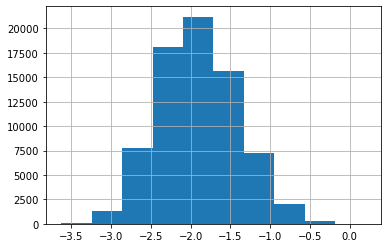

In [20]:
train.score_bki.hist();

Найдем выбросы

In [21]:
def outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1  #находим межквартильное расстояние
    lower_bound = quartile_1 - (iqr * 1.5)  #нижняя граница коробки
    upper_bound = quartile_3 + (iqr * 1.5)  #верхняя граница коробки
    return data[((data > upper_bound) | (data < lower_bound))]

In [22]:
len(outliers(train.score_bki))/len(train.score_bki), len(outliers(test.score_bki))/len(test.score_bki)

(0.0047561620076152795, 0.00459434922556329)

Выбросов 0,4%. Удалять не будем, ухудшается ROC AUC

In [23]:
#quartile_1, quartile_3 = np.percentile(train.score_bki, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#train = train.loc[train.score_bki.between(lower_bound, upper_bound)]

In [24]:
#quartile_1, quartile_3 = np.percentile(test.score_bki, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#test = test.loc[test.score_bki.between(lower_bound, upper_bound)]

Принцип формирования балла непонятен

# 2.4.region_rating

рейтинг региона

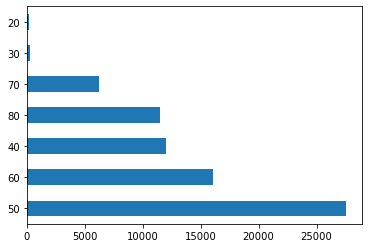

In [25]:
train['region_rating'].value_counts().plot.barh()

In [26]:
train['region_rating'].unique(), test['region_rating'].unique()

(array([50, 80, 60, 40, 70, 20, 30]), array([50, 40, 80, 60, 70, 20, 30]))

Существует 7 видов регионов. Принцип определения рейтинга не понятен

# 2.5.sna

связь заемщика с клиентами банка

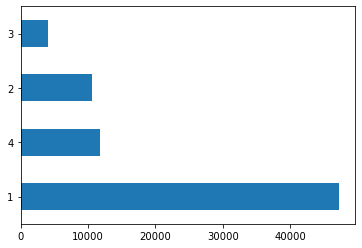

In [27]:
train['sna'].value_counts().plot.barh()

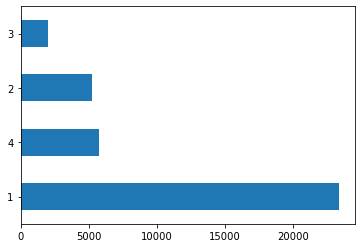

In [28]:
test['sna'].value_counts().plot.barh()

Существует 4 типа связи заяемщиков с клиентами банка

# 2.6.first_time

давность наличия информации о заемщике

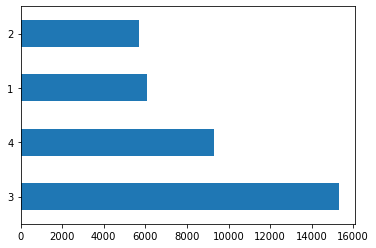

In [29]:
test['first_time'].value_counts().plot.barh()

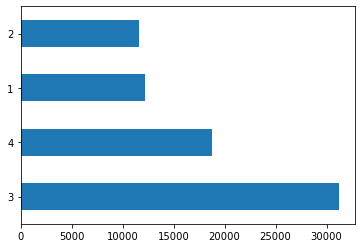

In [30]:
train['first_time'].value_counts().plot.barh()

Существует 4 типа давности

# 2.7. Группировка данных по группам

Признаки сгруппируем по типу их обработки (категориальные, бинарные и числовые)

In [31]:
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['month', 'education', 'home_address', 'work_address', 'sna', 'first_time','weekday']
num_cols = ['days', 'age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income']
num_cols_2 = ['days', 'age', 'decline_app_cnt', 'bki_request_cnt', 'region_rating', 'income']

# 2.8. Нумерические признаки

2.8.1. days

In [32]:
len(outliers(train.days))/len(train.days), len(outliers(test.days))/len(test.days)

(0.0, 0.0)

Выбросов нет

2.8.2. age

In [33]:
len(outliers(train.age))/len(train.age), len(outliers(test.age))/len(test.age)

(0.0, 0.0)

Выбросов нет

2.8.3.decline_app_cnt

In [34]:
len(outliers(train.decline_app_cnt))/len(train.decline_app_cnt), len(outliers(test.decline_app_cnt))/len(test.decline_app_cnt)

(0.17053076599953929, 0.16759745797683567)

Выбросов 17%

2.8.4. bki_request_cnt

In [35]:
len(outliers(train.bki_request_cnt))/len(train.bki_request_cnt), len(outliers(test.bki_request_cnt))/len(test.bki_request_cnt)

(0.023780810038076396, 0.02423725549533687)

Выбросов  2,5% . Удалять не будем, ухудшается ROC AUC

In [36]:
#quartile_1, quartile_3 = np.percentile(train.bki_request_cnt, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#train = train.loc[train.bki_request_cnt.between(lower_bound, upper_bound)]

In [37]:
#quartile_1, quartile_3 = np.percentile(test.bki_request_cnt, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#test = test.loc[test.bki_request_cnt.between(lower_bound, upper_bound)]

2.8.5. income

In [38]:
len(outliers(train.income))/len(train.income), len(outliers(test.income))/len(test.income)

(0.06361874822152061, 0.06341302374205618)

Выбросов 6%. Удалять не будем, ухудшается ROC AUC

In [39]:
#quartile_1, quartile_3 = np.percentile(train.income, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#train = train.loc[train.income.between(lower_bound, upper_bound)]

In [40]:
#quartile_1, quartile_3 = np.percentile(test.income, [25, 75])
#iqr = quartile_3 - quartile_1
#lower_bound = quartile_1 - (iqr * 1.5)
#upper_bound = quartile_3 + (iqr * 1.5)
#test = test.loc[test.income.between(lower_bound, upper_bound)]

Прологорифмируем признаки

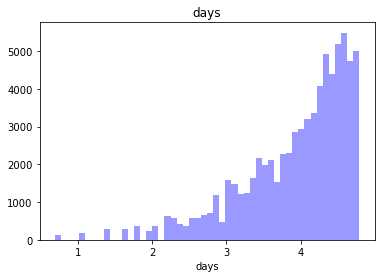

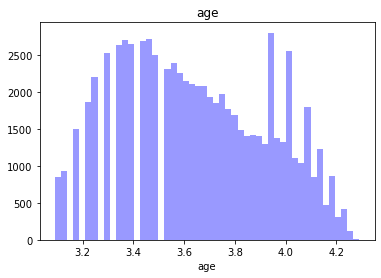

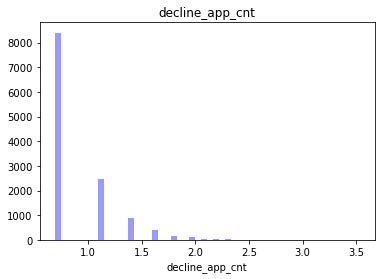

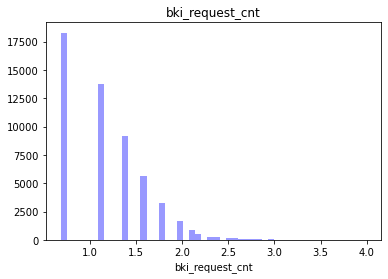

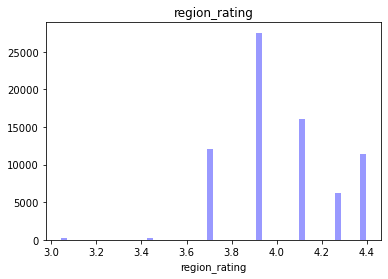

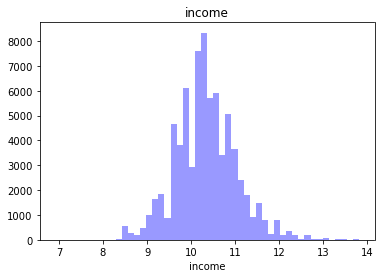

In [41]:
for i in num_cols_2:
 train[i] = np.log(train[i] + 1)
 plt.figure()
 sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False, color='b')
 plt.title(i)
 plt.show()

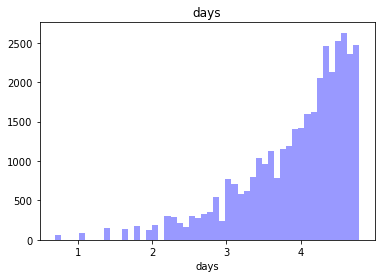

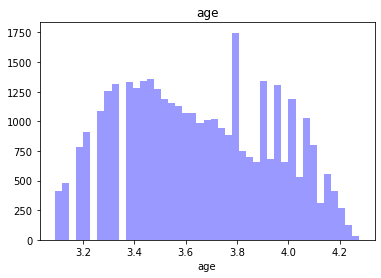

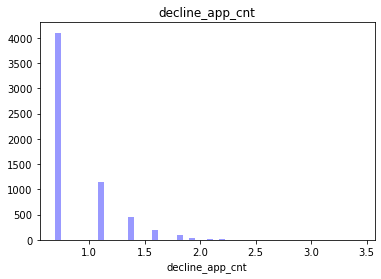

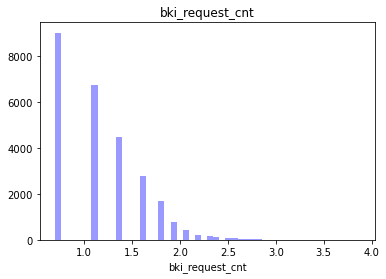

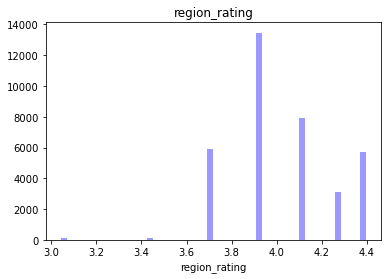

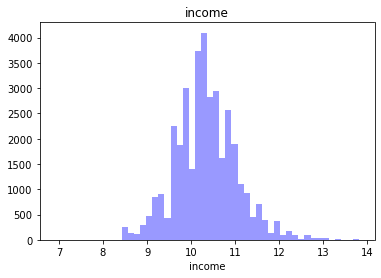

In [42]:
for i in num_cols_2:
 test[i] = np.log(test[i] + 1)
 plt.figure()
 sns.distplot(test[i][test[i] > 0].dropna(), kde = False, rug=False, color='b')
 plt.title(i)
 plt.show()

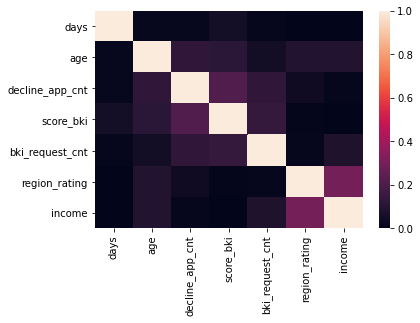

In [43]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

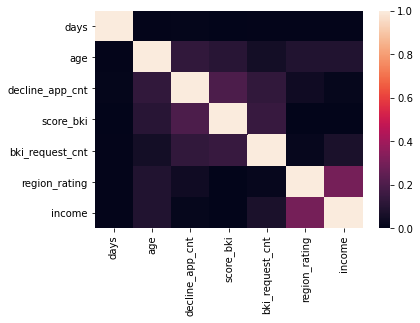

In [44]:
sns.heatmap(test[num_cols].corr().abs(), vmin=0, vmax=1)

коэффициенты корреляции небольшие. Берем в модель все признаки

# 2.9.Бинарные признаки

Переведем каждое значение бинарных признаков в уникальное число при помощи  LabelEncoder()

In [45]:
label_encoder = LabelEncoder()
for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
for column in bin_cols:
    test[column] = label_encoder.fit_transform(test[column])  
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,home_address,work_address,income,sna,first_time,foreign_passport,default,days,month,weekday
0,25905,2014-02-01,1,1,4.143135,1,1,0.000000,0,-2.008753,...,1,2,9.798183,4,1,0,0,3.465736,2,5
1,63161,2014-03-12,1,0,4.094345,0,0,0.000000,0,-1.532276,...,2,3,9.852247,4,1,0,0,4.262680,3,2
2,25887,2014-02-01,1,1,3.258097,1,0,1.098612,0,-1.408142,...,1,2,10.308986,1,4,1,0,3.465736,2,5
3,16222,2014-01-23,1,0,3.988984,0,0,0.000000,0,-2.057471,...,2,3,9.210440,1,3,0,0,3.135494,1,3
4,101655,2014-04-18,2,1,3.891820,0,0,0.000000,1,-1.244723,...,2,3,10.308986,1,4,1,0,4.682131,4,4


In [46]:
train[bin_cols].head()

,sex,car,car_type,good_work,foreign_passport
0,1,1,1,0,0
1,0,0,0,0,0
2,1,1,0,0,1
3,0,0,0,0,0
4,1,0,0,1,1


# 2.10.Категориальные признаки

In [47]:
x_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
x_cat_test = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)

print(x_cat.shape)
print(x_cat_test.shape)

(73799, 30)
(36349, 30)


Значимость категориальных признаков

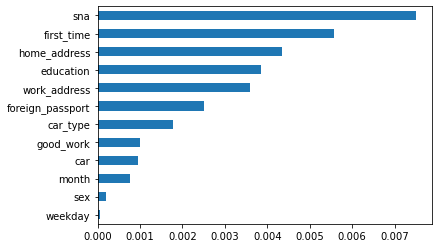

In [48]:
imp_cat = pd.Series(mutual_info_classif(train[bin_cols + cat_cols],
                                        train['default'], discrete_features =True),
                    index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Сымый важный признак sna

# 2.11. Числовые признаки

Значимость числовых признаков

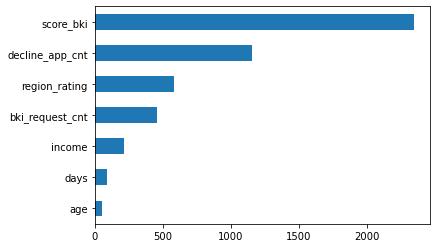

In [49]:
imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самый важный  числовой  признак score_bki

# 3.Машинное обучение

Стандартизируем числовые переменные

In [50]:
x_num = StandardScaler().fit_transform(train[num_cols])
x_num_test = StandardScaler().fit_transform(test[num_cols])
print(x_num)
print(x_num_test)

[[-0.62679289  1.71113664 -0.42001208 ... -0.28100505 -0.43806048
  -0.78501579]
 [ 0.45924468  1.5399884  -0.42001208 ...  0.77260728 -0.43806048
  -0.70752611]
 [-0.62679289 -1.39343857  2.60673323 ... -0.28100505  1.61690623
  -0.05288771]
 ...
 [ 1.08041325 -0.66507223 -0.42001208 ...  1.11179469  1.61690623
   0.5282444 ]
 [-3.46055749 -0.89146325 -0.42001208 ...  0.77260728 -0.43806048
  -1.25140899]
 [-1.07683064 -0.35072683 -0.42001208 ...  0.33531865 -0.43806048
  -0.31419734]]
[[-0.63365333 -0.88333898 -0.416391   ...  0.76643419 -0.44251484
   0.68282058]
 [ 0.45867608  0.12606863  4.58898692 ...  0.33072139 -0.44251484
  -2.63253397]
 [-0.63365333  0.97850869 -0.416391   ... -0.28338131 -0.44251484
  -0.05272498]
 ...
 [ 1.00797578 -0.65688874  2.65264242 ... -0.28338131 -0.44251484
   0.9453502 ]
 [ 0.56987062 -1.12541848  1.5199535  ...  0.33072139  1.60754806
  -0.05272498]
 [ 0.90041884  0.0372345  -0.416391   ...  0.33072139 -0.44251484
  -1.05077617]]


Объединяем признаки в сет

In [51]:
X = np.hstack([x_num, train[bin_cols].values, x_cat])
Y = train['default'].values
id_test = test.client_id
test = np.hstack([x_num_test, test[bin_cols].values, x_cat_test])

In [52]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Выполним регуляризацию. Поиск лучших гиперпараметров

In [53]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = ['balanced', None]

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty,class_weight=class_weight)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
#print('Лучшее solver:', best_model.best_estimator_.get_params()['solver'])
print('Лучшее class_weight:', best_model.best_estimator_.get_params()['class_weight'])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/line

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/line

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

Лучшее Penalty: l2
Лучшее C: 166.81005372000593
Лучшее class_weight: None


Обучаем модель, генерируем результат и сравниваем с тестом

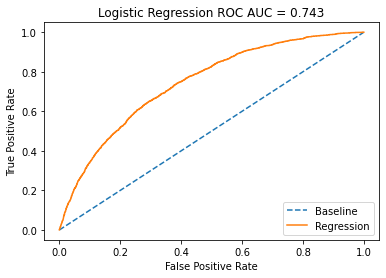

In [54]:
lgr = LogisticRegression(penalty = 'l2', C=166, class_weight='None', solver ='saga')
lgr.fit(X_train, y_train)
probs = lgr.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

ROC AUC = 0.743

Запишем рузультат на тестовых данных

In [55]:
lgr = LogisticRegression(penalty = 'l2', C=166, class_weight='None',solver ='saga')
lgr.fit(X, Y)
probs = lgr.predict_proba(test)
probs = probs[:,1]

In [56]:
my_submission = pd.DataFrame({'client_id': id_test, 
                            'default': probs})
my_submission.to_csv('submission.csv', index=False)

my_submission

,client_id,default
0,74835,0.044540
1,17527,0.323137
2,75683,0.069546
3,26883,0.098879
4,28862,0.019136
...,...,...
36344,83775,0.354353
36345,106254,0.015657
36346,81852,0.281611
36347,1971,0.199523
